# What the Fandango?

Fandango is a site where you can book tickets and see stats on movies, most notably the average user rating using a 5 star rating system. A [previous article about Fandango's movie ratings by Walt Hickey](https://fivethirtyeight.com/features/fandango-movies-ratings/) exposed Fandango for altering ratings by rounding them up even in cases where it shouldn't have (ex. a 4.1 star movie going to 4.5 or even higher). 

Fandango reported this as a bug that caused these issues and it has presumably been fixed. To see if that's the case we will analyze whether there have been any changes to Fandango's rating system. Using Hickey's previous data and data gathered for movies released in 2016 and 2017 on Fandango we'll see if this issue is still persistent.

## Exploring the Data

Let's load up the fandango and movie rating data and see what they contain.

In [1]:
import pandas as pd

fandango_score_comparison = pd.read_csv('fandango_score_comparison.csv')
movie_ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
fandango_score_comparison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [3]:
fandango_score_comparison.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
movie_ratings_16_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [5]:
movie_ratings_16_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


### Isolating what we need

Since we are looking at Fandango's scores lets isolate all the columns that we'd need from each dataset that pertain to Fandango rather than IMdb, Rotton Tomatoes, etc.

In [6]:
condensed_fandango = fandango_score_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
condensed_16_17 = movie_ratings_16_17[['movie', 'year', 'fandango']].copy()

In [7]:
condensed_fandango.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [8]:
condensed_16_17.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


### Population Description

Looking at the README files for each dataset we see that neither were obtained by random sampling and instead had some guidelines to the collection.

For `fandango_score_comparison`:

* Each movie had to have at least 30 user reviews
* Each movie had to have ticket sales in 2015

For `movie_ratings_16_17`:

* Each movie had to have been released in 2016 or later
* Each movie had to have a 'significant' number of reviews and votes (the criteria for what 'significant' was wasn't made entirely clear from the README file)


### Changing Scope of Analysis

Since our original population we wanted to analyze would have been all of Fandango's listings we will have to change the scope of our project. To keep within the scope of our data we will only analyze popular movies of 2015 and 2016 to limit sampling error. We'll define popular with having more than 30 movie ratings from users.

In [9]:
len(condensed_fandango[condensed_fandango['Fandango_votes'] < 30])

0

We can double check the fandango dataset and see that there are no movies that have below 30 user ratings. To double check `condensed_16_17` dataset we will take a random sample and see if there are more than 30 user ratings on movies in the set.

In [10]:
condensed_16_17.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Looking these movies up manually you see that all but one have more than 30 user ratings.

|Movie| Number of User Ratings|
|---|---|
|Mechanic: Resurrection|	2247|
|Warcraft|	7271|
|Max Steel|	493|
|Me Before You	|5263|
|Fantastic Beasts and Where to Find Them|	13400|
|Cell|	17|
|Genius|	127|
|Sully|	11877|
|A Hologram for the King|	500|
|Captain America: Civil War|	35057|


Based on just this sampling from Fandango we have about 90% of the movies as being 'popular' according to our definition which is enough to proceed with our analysis.


### Cleaning by Year

The next step is to make sure only movies from 2015 and 2016 will be included in this analysis.

In [11]:
condensed_16 = condensed_16_17[condensed_16_17['year'] == 2016]

In [12]:
condensed_16['year'].unique()

array([2016])

In [13]:
condensed_fandango['Year'] = condensed_fandango['FILM'].str[-5:-1]

In [14]:
# checking how year is labeled in `year` column
condensed_fandango.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [15]:
condensed_fandango['Year'].unique()

array(['2015', '2014'], dtype=object)

In [16]:
condensed_15 = condensed_fandango[condensed_fandango['Year'] == '2015']

In [17]:
condensed_15['Year'].unique()

array(['2015'], dtype=object)

## Visualizing the 2015/2016 data

Now we can visualize the data and compare it to one another to see how close they are to each other.

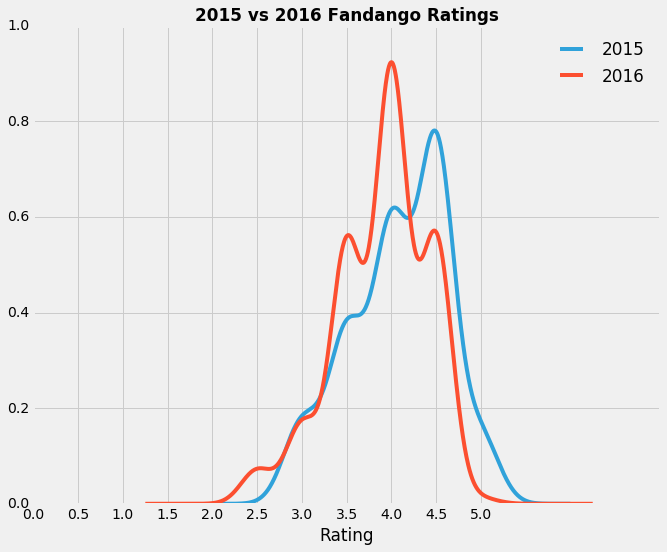

In [18]:
import matplotlib.pyplot as plt
from numpy import arange
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')

condensed_15['Fandango_Stars'].plot.kde(legend = True, label = '2015', figsize = ([10,8]))
condensed_16['fandango'].plot.kde(legend = True, label = '2016')
plt.title('2015 vs 2016 Fandango Ratings',
          fontsize = 'large',
         fontweight = 'bold')
plt.xlabel('Rating')
plt.ylabel('')
plt.xticks(np.arange(0,5.5,.5))
plt.show()

Both datasets Fandango scores are skewed left which is to be expected as Fandango rarely gives scores below 3. The 2016 dataset is slighty to the left of the 2015 set meaning the 2016 set has lower ratings overall compared to the 2015 dataset. 

## Comparing Relative Frequencies

Let's compare the data using relative frequencies and see if we can see what the visualization showed us with more granular data.

In [31]:
print('2015' + '\n' + '-' * 16)
condensed_15['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [32]:
print('2016' + '\n' + '-' * 16)
condensed_16['fandango'].value_counts(normalize=True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

We can see that there were definitely less 5 star movies in 2016 with them only making up 0.5% of the movies listed rather than a whooping 7%. There is also a 13% drop in 4.5 star movies between 2015 and 2016. 

The minimum number value of stars also went down from 3 stars to 2.5 stars being the lowest. There is an increase in the number of 3.5 and 4 star movies in 2016 due to the lower ratings that movies received.

These all correlate with the findings from the graph earlier and reaffirm that ratings have in fact gone lower.

## Determining the Direction of the Change

Let's take a look at the mean, median, and mode of the data from 2015 and 2016 and see a more precise image of the change in ratings.

In [23]:
mean_15 = condensed_15['Fandango_Stars'].mean()
mean_16 = condensed_16['fandango'].mean()

In [24]:
median_15 = condensed_15['Fandango_Stars'].median()
median_16 = condensed_16['fandango'].median()

In [25]:
mode_15 = condensed_15['Fandango_Stars'].mode()[0]
mode_16 = condensed_16['fandango'].mode()[0]

In [26]:
summary = pd.DataFrame()
summary['2015'] = [mean_15, median_15, mode_15]
summary['2016'] = [mean_16, median_16, mode_16]
summary.index = ['Mean', 'Median', 'Mode']

In [27]:
print(summary)

            2015      2016
Mean    4.085271  3.887435
Median  4.000000  4.000000
Mode    4.500000  4.000000


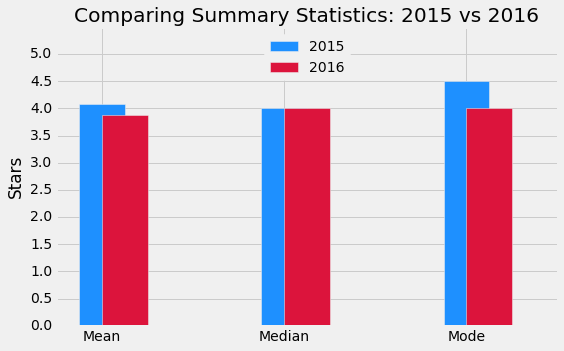

In [28]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = 'dodgerblue', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = 'crimson', align = 'edge', label = '2016', width = .25,
                        rot = 0, figsize = (8,5))

plt.ylabel('Stars')
plt.title('Comparing Summary Statistics: 2015 vs 2016')
plt.ylim(0,5.5)
plt.yticks((np.arange(0,5.5,.5)))
plt.legend(loc = 'upper center', fontsize = 'medium')
plt.show()


### Conclusion

Looking at the above chart we can see that, while the median value didn't change, there was a change in the average and mode values between 2015 and 2016.

This could suggest that Fandango has indeed fixed its rounding up problem that their website had. We can't be 100% sure of this as they have remove the actual unrounded ratings from their HTML but, based on the data we have been given, this may indicate a fix in rounding stars.

Further steps from here on to confirm these finding would repeat this analysis with the years 2017 and onwards in order to see if trend is still going but unfortunately this will be hampered as Fandango no longer lists what it's true rating is in the HTML code on the site.